# Workshop 1: Exploring Numerical Summing Schemes

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[MUDE in Madras](https://tudelft-mude.github.io/workshop-iitm/): Week 1, November 27, 2024.*

*This assignment does not need to be turned in.*

## Problem definition: Numerical Integration

Integration can be used to solve differential equations and to calculate relevant quantities in diverse engineering and scientific problems. When analyzing experiments or numerical models results, a desired physical quantity may be expressed as an integral of measured/model quantities. Sometimes the analytical integration is known, then this is the most accurate and fastest solution, certainly better than computing it numerically. However, it is common that the analytic solution is unknown, then numerical integration is the way to go. 


You will use a function with a known integral to evaluate how precise numerical integration can be. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


plt.rcParams['figure.figsize'] = (15, 5)  # Set the width and height of plots in inches
plt.rcParams.update({'font.size': 13})    # Change this value to your desired font size

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>   

Calculate and evaluate the following integral by hand: 

$$I=\int_a^{b} f\left(x\right)\mathrm{d}x = \int_0^{3\pi} \left(20 \cos(x)+3x^2\right)\mathrm{d}x.$$

The result will be later used to explore how diverse numerical integration techniques work and their accuracy. 

</p>
</div>

In [2]:

# YOUR SOLUTION HERE
exact_integral_evaluated = 27*np.pi**3 #your integrated function here 



# Test your answer
assert abs(exact_integral_evaluated - 837.16947)< 1e-5, "Oops it's incorrect. Please check your derivation the integral "
print("The exact value of the integral is: ", exact_integral_evaluated)

The exact value of the integral is:  837.1694703680951


**Function definition**

Let's define the python function  


$$f\left(x\right) = \left(20 \cos x+3x^2\right)\mathrm{d}x$$ 

In [3]:
# Define the function to be later integrated
def f(x):
    return 20*np.cos(x)+3*x**2

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>   

Call the function f written below to evaluate it at x=0. 
</p>
</div>

In [4]:
## YOUR CODE HERE
f_at_x_equal_0 = f(0)

print("f evaluated at x=0 is:" , f_at_x_equal_0)

f evaluated at x=0 is: 20.0


<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>NOTE:</b> Calling f(x) is equivalent to evaluating it! 

</p>
</div>

**Define an x vector to evaluate the function**

The function `f(x)` exists in "all space". However, the integration is bounded to the limits `a to b`, $I=\int_a^{b} f\left(x\right)\mathrm{d}x = \int_0^{3\pi} \left(10 \cos(x)+4x\right)\mathrm{d}x$. 

<br><br>
Use those limits to create an x array using `linspace(a,b,n)`,  where `a` is the limit to the left, `b` is the limit to the right and `n` is the number of points. Below you see the case with 5 points.

<img src="linspace.jpg" style="height:100px" />


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Define the intervals `a,b` and the number of points needed to have a subinterval length $\Delta x=\pi$. 
</p>
</div>

In [5]:
# YOUR CODE HERE
a = 0
b = 3*np.pi#
number_of_points = 4

x_values = np.linspace(a, b, number_of_points)
dx = x_values[1]-x_values[0]

print("x  = ",x_values)



# test dx value
assert abs(dx - np.pi)<1e-5, "Oops! dx is not equal to pi. Please check your values for a, b and number of points."

x  =  [0.         3.14159265 6.28318531 9.42477796]


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   

How do the number of points and number of subintervals relate? Write a brief answer below.
</p>
</div>

**Visualize a "continuous" function and list comprehension**

For visualization purposes in the rest of the notebook, `f(x)` is here evaluated with high resolution. A "list comprehension" method is used for this purpose, which is a special feature of the Python programming language (you learned about it in the PA!).


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   

Three equivalent solutions to define <code>f_high_resolution</code> are shown below. The first one loops <code>x_high_resolution</code> and assigns its values to x, which is then used to evaluate f. 

The second one creates an index list based on the number of points contained in <code>x_high_resolution</code>, then loops it to evaluate f at each element of <code>x_high_resolution</code>.

The third simply uses a function to evaluate the values.

Which method do you find easier to read/write?
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>
<b>NOTE:</b> although list comprehensions may look more cumbersome here, it is important tool to learn, as in more complex code it can help make the algorithm easier to read and write. In terms of computation time, list comprehensions are faster than "regular" for loops (both are native Python features), However, the third approach is actually the fastest in terms of numerical computation time, because Numpy ndarrays (not native Python) are optimized for efficient computation.

</p>
</div>

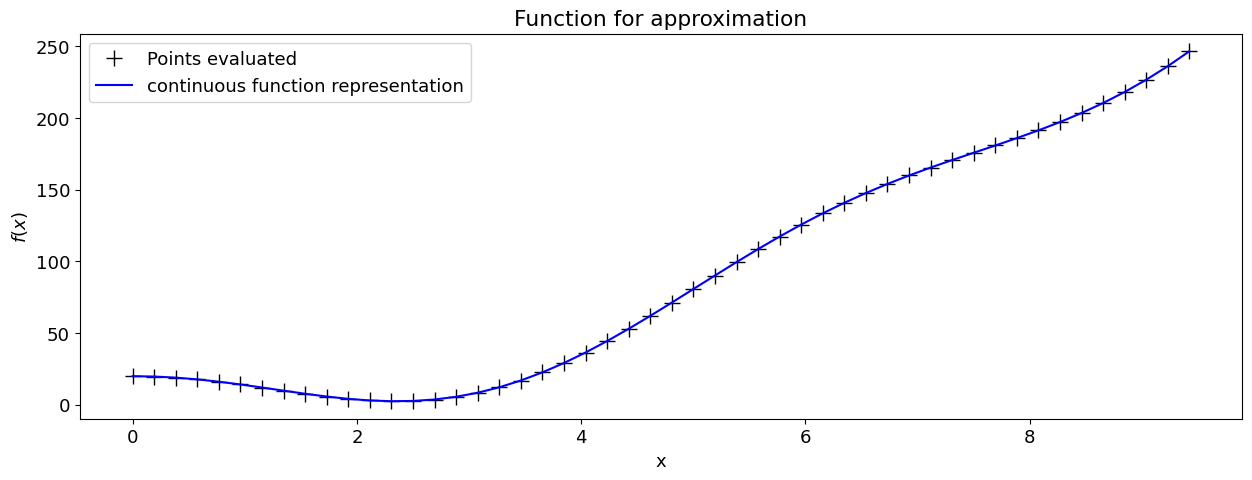

In [6]:
# To plot a smooth graph of the function
x_high_resolution = np.linspace(a, b, 50)

#first solution
f_high_resolution = [ f(x) for x in x_high_resolution ]
#second solution
f_high_resolution = [ f(x_high_resolution[i]) for i in range(len(x_high_resolution))] 
#third solution
f_high_resolution = f(x_high_resolution)

# Plotting
plt.plot(x_high_resolution, f_high_resolution, '+', markersize='12', color='black')
plt.plot(x_high_resolution, f_high_resolution, 'b')
plt.legend(['Points evaluated','continuous function representation'])
plt.title('Function for approximation')
plt.xlabel('x')
plt.ylabel('$f(x)$');

<b>The Left Riemann Sum</b>

This method approximates an integral by summing the area of rectangles defined with left points of the function:

$$I_{_{left}} \approx \sum_{i=0}^{n-1} f(x_i)\Delta x$$

From now on, you will use ten points to define the function.
<br><br>

Let's look at the implementation of the Left Riemman sum following the same methods described in task 5. The differences are that (i) the index of the vector x ignores the last point, (2) the multiplication by $\Delta x$ and (iii) the sum of the vector. Thus the result is not an array but a single number.  
<br><br>



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>   

Scrutinize the correct implementations below. Why is it necessary to ignore the last point in x_values? What would happen if you include it?  
</p>
</div>

In [7]:

x_values = np.linspace(a, b, 10) 
dx = x_values[1]-x_values[0]

# Left Riemann summation: 1st option

I_left_riemann = sum( [f(x)*dx for x in x_values[:-1]] )  #method 1
print(f"Left Riemann Sum: {I_left_riemann: 0.3f}")
# Left Riemann summation: 2nd option
I_left_riemann = sum( [ f(x_values[i])*dx for i in range(len(x_values)-1) ] )  #method 2
print(f"Left Riemann Sum: {I_left_riemann: 0.3f}")

Left Riemann Sum:  723.753
Left Riemann Sum:  723.753


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   

Scrutinize the correct implementation below to visualize the bar plot (plt.bar) and location of the points (plt.plot with '*', in the line code below plt.bar) that define the height of each rectangle. 
<br>
<br>
Tip: The bar plot requires one less element than the total number of points defining the function.  
</p>
</div>

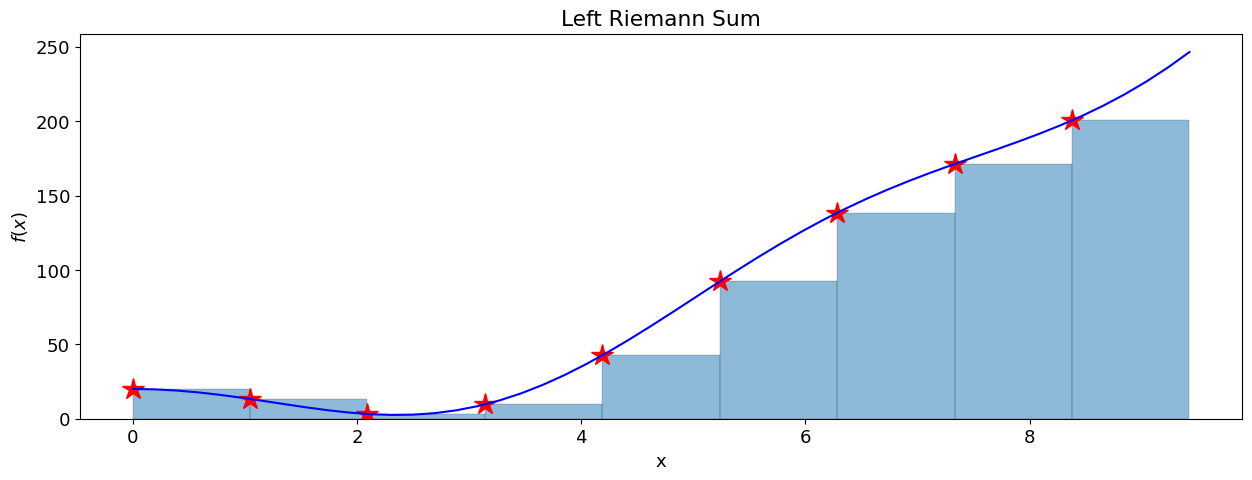

In [8]:
# Visualization
# Plot the rectangles and left corners of the elements in the riemann sum
plt.bar(x_values[:-1],[f(x) for x in x_values[:-1]], width=dx, alpha=0.5, align='edge', edgecolor='black', linewidth=0.25)
plt.plot(x_values[:-1],[f(x) for x in x_values[:-1]], '*', markersize='16', color='red')

#Plot "continous" function
plt.plot(x_high_resolution, f_high_resolution, 'b')
plt.title('Left Riemann Sum')
plt.xlabel('x')
plt.ylabel('$f(x)$');

**The Right Riemann Method**

Similar to the left Riemann sum, this method is also algebraically simple to implement, and can be better suited to some situations, depending on the type of function you are trying to approximate. In this case, the subintervals are defined using the right-hand endpoints from the function and is represented by 

$$I_{_{right}} \approx \sum_{i=1}^n f(x_i)\Delta x$$



<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

Complete the code cell below for the right Riemman method.. 

Tip: Consult the Left Riemann implementation above as a guide.
</p>
</div>

In [9]:
I_right_riemann = sum( [f(x)*dx for x in x_values[1:]] ) 

print(f"Right Riemann Sum: {I_right_riemann: 0.3f}")

Right Riemann Sum:  960.921


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   

Complete the code cell below to visualize the right Riemman method.

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; width:95%; border-radius: 10px">
<p>
<b>NOTE:</b> the plot here uses <code>-dx</code>, as done in the PA for this week to allow the <code>x_values</code> to remain consistent for each method (and with the analytic expressions).

</p>
</div>

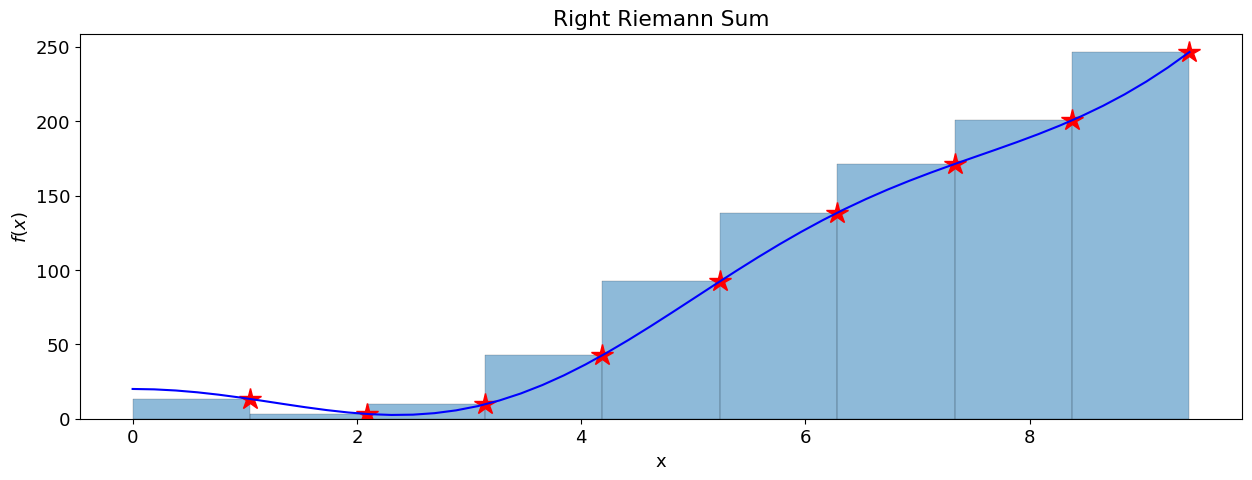

In [10]:
# Right Riemann sum visualization
plt.bar(x_values[1:],[f(x) for x in x_values[1:]],
        width=-dx, alpha=0.5, align='edge',
        edgecolor='black', linewidth=0.25)
plt.plot(x_values[1:],[f(x) for x in x_values[1:]],
         '*', markersize='16', color='red')
#Plot "continuous" function
plt.plot(x_high_resolution, f_high_resolution, 'b')
plt.title('Right Riemann Sum')
plt.xlabel('x')
plt.ylabel('$f(x)$');

**Midpoint Method Approximation**

For a function defined with constant steps (uniform $\Delta x$), the midpoint method approximates the integral taking the midpoint of the rectangle and splitting the width of the rectangle at this point. 

$$I_{_{mid}} \approx \sum_{i=0}^{n-1} f\left(\frac{x_i+x_{i+1}}{2}\right)\Delta x $$


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 10:</b>   

Complete the code cell below to implemen the midpoint sum below.
</p>
</div>

In [11]:
I_midpoint = sum([f((x_values[i] + x_values[i+1]) / 2)*dx for i in range(len(x_values)-1)])
print(f"Midpoint Sum: {I_midpoint: 0.3e}")

I_midpoint = sum([f(x_at_the_middle)*dx for x_at_the_middle in (x_values[:-1]+x_values[1:])/2 ])
print(f"Midpoint Sum: {I_midpoint: 0.3e}")

Midpoint Sum:  8.346e+02
Midpoint Sum:  8.346e+02


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 11:</b>   

Complete the code cell below to visualize the midpoint method.

</p>
</div>

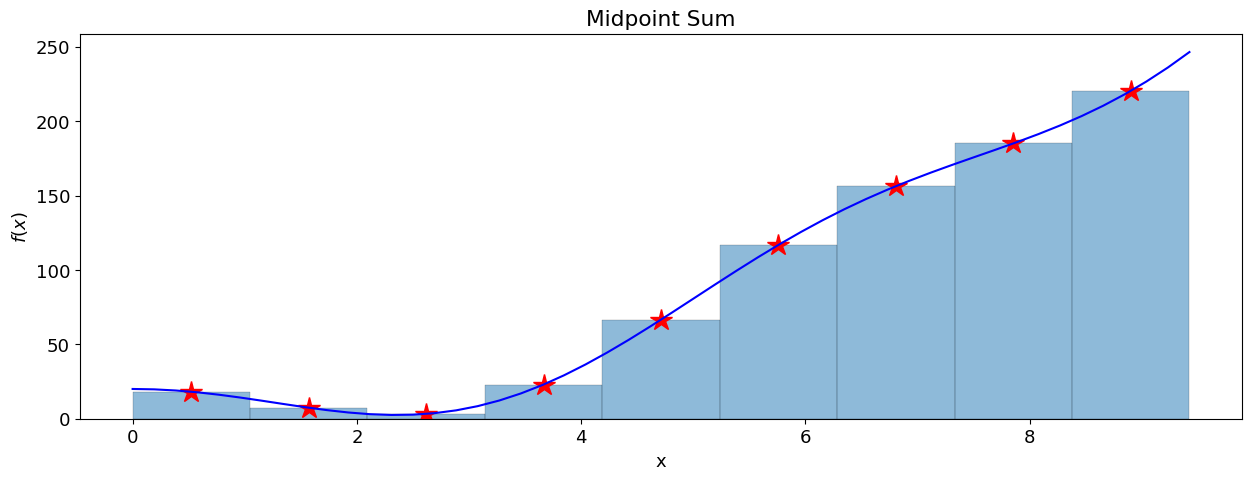

In [12]:
# Midpoint sum visualization
plt.bar(x_values[:-1],[f(x_at_the_middle) for x_at_the_middle in (x_values[:-1]+x_values[1:])/2 ], width=dx, alpha=0.5, align='edge', edgecolor='black', linewidth=0.25)
plt.plot((x_values[:-1]+x_values[1:])/2,[f(x_at_the_middle) for x_at_the_middle in (x_values[:-1]+x_values[1:])/2 ],'*',markersize='16', color='red')
#Plot "continous" function
plt.plot(x_high_resolution, f_high_resolution, 'b')
plt.title('Midpoint Sum')
plt.xlabel('x')
plt.ylabel('$f(x)$');

**Trapezoidal Rule**

This method requires two evaluations of the function $f$ for each 'rectangle', at its left and right corners. In fact, it does not represent a 'rectangle anymore' but a trapezoid. For a 1D case, it is a rectangle with a triangle on top.  

$$I_{_{trapezoid}} \approx \sum_{i=0}^{n-1}\frac{f(x_i)+f(x_{i+1})}{2}\Delta x $$

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 12:</b>   

Complete the following code to implement the trapezoidal rule for the sum. 

</p>
</div>

In [13]:
I_trapezoidal = sum([(f(x_values[i]) + f(x_values[i+1])) / 2 * dx for i in range(len(x_values)-1)]) 
print(f"Trapezoidal Sum: {I_trapezoidal: 0.5e}")

Trapezoidal Sum:  8.42337e+02


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 13:</b>   

To visualize the trapezoidal method a plt.bar is not used rather plt_fill_between. Revise the code cell below.

</p>
</div>

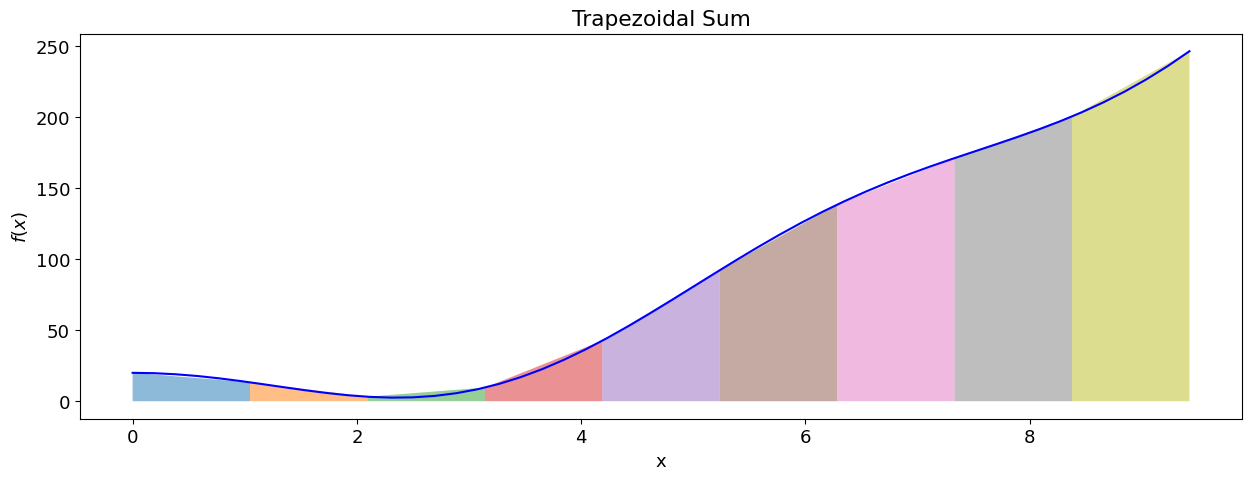

In [14]:
# Trapezoidal sum
for i in range(len(x_values)-1):
    plt.fill_between([x_values[i], x_values[i+1]], 
                     [f(x_values[i]), f(x_values[i+1])], 
                     alpha=0.5)

#Plot "continous" function
plt.plot(x_high_resolution, f_high_resolution, 'b')
plt.title('Trapezoidal Sum')
plt.xlabel('x')
plt.ylabel('$f(x)$');



**Absolute errors in integral**

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 14:</b>   

Compute the absolute errors of each method. Are they similar to your expectatations? (i.e. corresponding to the orders of magnitude).

</p>
</div>

In [15]:
# Calculate absolute errors
left_riemann_error = abs(exact_integral_evaluated - I_left_riemann)
right_riemann_error = abs(exact_integral_evaluated - I_right_riemann)
midpoint_error = abs(exact_integral_evaluated - I_midpoint)
trapezoidal_error = abs(exact_integral_evaluated - I_trapezoidal)

# Print the results
print(f"Left Riemann Error: {left_riemann_error: 0.3e}")
print(f"Right Riemann Error: {right_riemann_error: 0.3e}")
print(f"Midpoint Error: {midpoint_error: 0.3e}")
print(f"Trapezoidal Error: {trapezoidal_error: 0.3e}")


Left Riemann Error:  1.134e+02
Right Riemann Error:  1.238e+02
Midpoint Error:  2.584e+00
Trapezoidal Error:  5.168e+00


**Simpson's Rule**

Simpson's rule is a method that uses a quadratic approximation over an interval that allows the top bound of the area 'rectangle' to be defined by a polynomial. In general, it can be a better approximation for curved, but mathematically smooth functions. It also has the requirement that subintervals must be an even number, so this is something to be aware of when using it in practise. As a sum, it is defined as 

$$\int^{b}_{a}f(x)\mathrm{d}x\approx \sum_{i=1}^{n/2}\frac{1}{3}(f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i}))\Delta x$$

where $n$ must be an *even integer*.

 

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Challenge</b>

Take what you have seen in the other numerical implementation codes and implement Simpson's Rule for the same integral! A redefinition of x_values is done with 9 points instead of 10 as an uneven number of points is required to apply Simpson's Rule. 
</p>
</div>

In [16]:
# Define Simpson's Rule here
x_values = np.linspace(a, b, 9)
dx = x_values[1]-x_values[0]                       
    
simpson_integral = sum([(f(x_values[2*i-2]) + 4*f(x_values[2*i-1]) + f(x_values[2*i])) / 3 * dx for i in range(1,int(len(x_values)/2)+1)]) 

# Calculate the absolute error
simpson_error = abs(exact_integral_evaluated - simpson_integral)

# Print the result and error
print(f"Simpson's Rule Integral: {simpson_integral: 0.5e}")
print(f"Simpson's Rule Absolute Error: {simpson_error: 0.5e}")


Simpson's Rule Integral:  8.37169e+02
Simpson's Rule Absolute Error:  0.00000e+00


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 15:</b>  
 
  
Refine the number of points using the integration by left riemmann until reaching a similar accuracy as for the trapezoidal rule. How much finer was your grid?

</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.